# Inlcuding Header Files 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve , roc_auc_score
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
file = pd.read_csv("data.csv" , index_col= 0)
file.head(20)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0
6,105,8,1,34.0,0,1,14,31,19,12,3,1,0,0
7,13,8,1,37.0,1,0,14,31,19,12,3,1,6,0
8,13,8,1,39.0,1,0,14,31,19,12,3,1,5,0
9,13,8,1,56.0,1,0,14,31,19,12,3,1,4,0


# Dividing dataset into features and result

In [3]:
x = file[["location" , "country" , "gender" , "age" , "vis_wuhan" , "from_wuhan" , "symptom1" , "symptom2" , "symptom3"
          , "symptom4" , "symptom5" , "symptom6" , "diff_sym_hos"]].values ## features
y = file.result.values ## result

# Resampling dataset

In [4]:
## splitting the dataset into xTrain , yTrain , xTest , yTest
xTrain , xTest , yTrain , yTest = train_test_split(x,y, test_size= 0.1 , shuffle= True , random_state= 3)

# Feature scaling

we are making feature scaling to the training and test data of independent variables , to reduce the size to a smaller value

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(xTrain)
X_test = sc.transform(xTest)

# Decision Tree model

In [6]:
classifier = DecisionTreeClassifier()
classifier.fit(xTrain , yTrain)

DecisionTreeClassifier()

# Finding Optimal Hyperparameters

In [7]:
 param_dist = {
     "criterion" : ["gini" , "entropy"],
     "max_depth" : [1,3,4,5,6,7,8,None],
     "min_samples_leaf": [5, 10, 20, 50, 100]
 }

In [8]:
grid = GridSearchCV(classifier , param_grid= param_dist , cv= 10 , n_jobs= -1)

In [9]:
grid.fit(xTrain , yTrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 4, 5, 6, 7, 8, None],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [10]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [11]:
grid.best_score_

0.9484015984015983

In [12]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}

# Decision Tree model with Optimal Hyperparameters

we will set max_depth of tree to be 4 and we will use the criterion is gini index with min_samples_leaf of 5

In [13]:
classifier = DecisionTreeClassifier(criterion= "gini", min_samples_leaf= 5 , max_depth= 4 , random_state= 42)
classifier.fit(xTrain , yTrain)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [14]:
y_pred = classifier.predict(X_test)

# Visualizing the Decision Tree

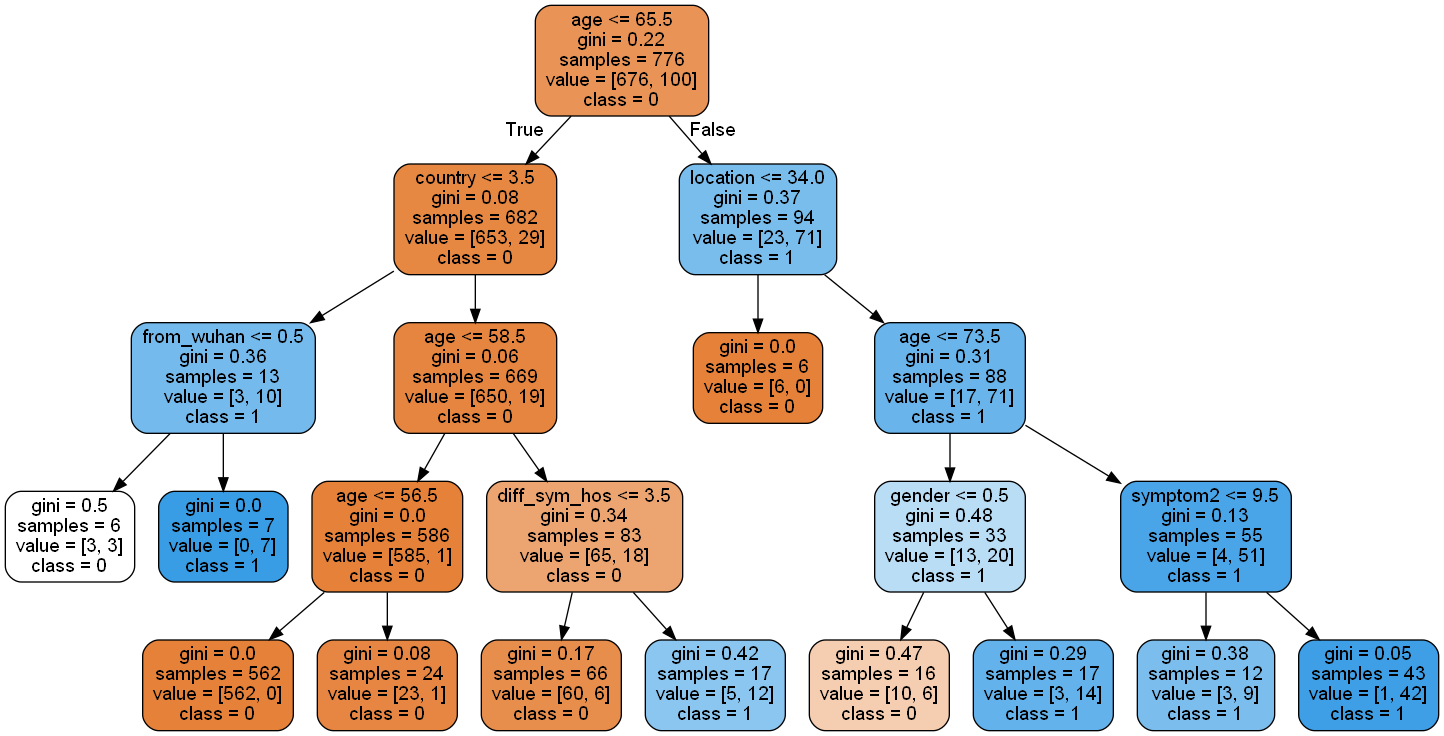

In [15]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
feature_cols = ["location" , "country" , "gender" , "age" , "vis_wuhan" , "from_wuhan" , "symptom1" , "symptom2" , "symptom3"
          , "symptom4" , "symptom5" , "symptom6" , "diff_sym_hos"]
export_graphviz(classifier, out_file= dot_data, feature_names = feature_cols,\
                class_names = ["0", "1"],\
                rounded = True, proportion = False, precision = 2, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Decision Tree.png")
Image(graph.create_png())

# Evaluating the model

we will evaluate our model using the confusion matrix and classification report by comparing the predicted and actual test values

In [16]:
cm = confusion_matrix(yTest, y_pred) ## confusion matrix
cr = classification_report(yTest,y_pred) ## classification report
print("Confusion matrix\n\n" ,cm , "\n")
print(cr)

Confusion matrix

 [[74  5]
 [ 6  2]] 

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        79
           1       0.29      0.25      0.27         8

    accuracy                           0.87        87
   macro avg       0.61      0.59      0.60        87
weighted avg       0.87      0.87      0.87        87



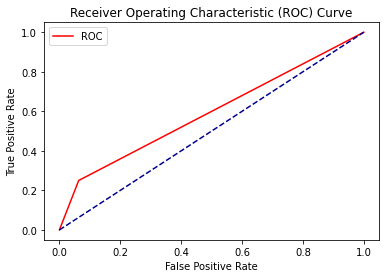

In [17]:
fpr, tpr, thresholds = roc_curve(yTest, classifier.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [18]:
roc_auc_score(yTest, classifier.predict_proba(X_test)[:,1])

0.5933544303797469